# Spożycie mięsa a zużycie wody

Na Ziemi jest 1 mld 360 km³ wody, jednak tylko 1% to dostępna woda słodka zdatna do spożycia. Bardzo ważne jest więc umiejętne użytkowanie tego ważnego surowca. Niestety na ten moment nadmiernie wykorzystujemy zasoby wodne, między innymi do  sztucznego nawadniania pól uprawnych. Około 1/3 światowego zboża i 80% światowj produkcji soi jest podawana zwierzętom, które hodowane są na żywność. Większość całkowitej objętości wody wykorzystywanej w hodowli zwierząt odnosi się do śladu wodnego paszy dla zwierząt.

Przeprowadzono badania, jak dieta europejczyków wpływa na ślad wodny pozostawiany przez człowieka. Przejście na zdrową mięsną dietę powoduje zmniejszenie śladu wodnego o 11–35%, na zdrową dietę wegetariańską z dodatkiem owoców morza - o 33-55% i na zdrową dietę wegetariańską o 35-55%. Są to duże liczby i warto przemyśleć swoje wybory konsumenckie, ponieważ wg różnych badań wody zacznie brakować już w 2050 roku, głównie przez powiększającą się populację (średnio 76 mln ludzi rocznie). 

Celem naszego projektu jest sprawdzenie, czym można zastąpić mięso w swojej diecie aby zmniejszyć pozostawiany po sobie ślad wodny, jednocześnie nie pozbawiając się potrzebnych wartości odżywczych zawartych w mięsie. Na początku pokażemy tabelę z listą produktów spożywczych, ile wody zużywa ich produkcja oraz zawartość wybranych wartości odżywczych.

In [1]:
#załadowanie potrzebnych bibliotek
using CSV, DataFrames, Printf

In [2]:
#pobranie danych o zużyciu wody i wartościach odżywczych poszczególnych produktów
foods_df = DataFrame(CSV.File("water_footprint_nowy2.csv"))
show(foods_df,allrows=true,allcols=true)

168×6 DataFrame
 Row │ Produkt                        zuzycie_wody_na_100_g  Energia(kcal)  Bialko     Tluszcze  Weglowodany 
     │ String31                       Float64                Float64        Float64    Float64   Float64     
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Almonds, shelled or peeled                    1609.5         626.0   29.0        49.2        13.3
   2 │ Anise                                          828.0         337.0   17.6        15.9        50.02
   3 │ Apple juice                                    114.1          46.0    0.0         0.0        11.67
   4 │ Apples, dried                                  684.7         243.0    0.93        0.32       65.9
   5 │ Apples, fresh                                   82.2          52.0    0.3         0.2        14.0
   6 │ Apricots                                       128.7         250.0    2.5         0.0        62.5
   7 │ Areca nuts     

W oparciu o wspomniene wcześniej badanie sporządziliśmy prostą animację pokazującą ile wody mogliby zaoszczędzić Polacy w ciągu roku przechodząc na dietę wegetariańską.

In [2]:
using Plots
using Printf

peop_count=37000000
meat_diet=5500*70
vege_diet=meat_diet*(45/100)

function bar_chart(k)
    A = peop_count*meat_diet
    B = ((peop_count)*((100-k)/100))*(meat_diet)+((peop_count)*((0+k)/100))*vege_diet
    Bf = @sprintf("%.0f", B)
    C = A-B
    Cf = @sprintf("%.0f", C)
    x = ["Zużyta woda w litrach\n przy 100% ludzi\n na diecie mięsnej", "Zużyta woda w litrach\n przy danym procencie ludzi\n na diecie wegetariańskiej", "Zaoszczędzona\n woda w litrach"]
    y = [A, B, C]
    colours = [:red, :green, :blue]
    bar(x, y, color=colours, legend = false)
    xlabel!("")
    ylabel!("")
    title!("Procent Ludzi na diecie wegańskiej: $(k)%")
end

anim = @animate for k in 0:100
    bar_chart(k)
end persist=true
mp4(anim,"Polska.mp4", fps = 5)

┌ Info: Saved animation to c:\Users\dell\Downloads\Polska.mp4
└ @ Plots C:\Users\dell\.julia\packages\Plots\9Q9pN\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\dell\\Downloads\\Polska.mp4")

Druga animacja obrazuje tą samą sytuację w przeliczeniu na baseny olimpijskie - jedna komórka macierzy to ilość wody równa objętości basenu olimpijskiego (3.5 mln litrów).

In [3]:
basen=(3.5)*10^6

function macierz(k,M)
    A = peop_count*meat_diet
    B = ((peop_count)*((100-k)/100))*(meat_diet)+((peop_count)*((0+k)/100))*vege_diet
    C=A-B
    ile= Int64(floor(C/basen))
    for j in 1:Int64(floor(ile/1517))
        for i in 1:1517
            M[j,i]=1
        end
    end
    for i in 1:Int64(ile%1517)
        M[Int64(floor(ile/1517))+1,i]=1
    end
    return(M)
end

function animacja(M)
  am= @animate for k in 1:100
    C=peop_count*meat_diet-(((peop_count)*((100-k)/100))*(meat_diet)+((peop_count)*((0+k)/100))*vege_diet)
  ile= Int64(floor(C/basen))
    M=Matrix(macierz(k,M))
    heatmap(M,aspect_ratio=1, seriescolor=palette([:white,:black]),title="$(k)% wegan oszczędza $(ile) basenów olimpijskich wody", colorbar=:none)
  end
  mp4(am,"baseny-anim.mp4",fps=5)
end

M=zeros(1517,1517)
animacja(M)


┌ Info: Saved animation to c:\Users\dell\Downloads\baseny-anim.mp4
└ @ Plots C:\Users\dell\.julia\packages\Plots\9Q9pN\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\dell\\Downloads\\baseny-anim.mp4")

Na następnych wykresach przedstawimy spożycie mięsa w wybranych krajach oraz zużycie wody, jakie ono generuje - na osobę oraz jako cały kraj. Warto zwrócić uwagę na różnice w ilości spożywanego mięsa w różnych krajach oraz jak to się rozkłąda patrząc na rodzaj mięsa - często powodem jest religia.

21×7 DataFrame
 Row │ kraje       meat     pork     beef     poultry  populacja(mln)  uwagi                           
     │ String15    Float64  Float64  Float64  Float64  Float64         String?                         
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ USA           107.0     30.0    26.0     51.0           331.9   jedznie na wynos skrzydełka itp
   2 │ Kanada        100.0     21.0    25.5     50.0            38.25  .
   3 │ Argentyna     110.0     20.0    42.0     48.0            45.8   bardzo duże spożycie mięsa
   4 │ Chile          86.4     27.0    22.4     37.0            19.49  .
   5 │ Meksyk         80.0     30.0     0.0     50.0           126.7   .
   6 │ Brazylia       78.5     18.5    40.0     20.0           214.3   .
   7 │ UE             69.8     33.5    10.6     24.3           447.7   wartości średnie
   8 │ Francja        85.0     16.0     5.0     64.0            67.75  .
   9 │ Niemcy      

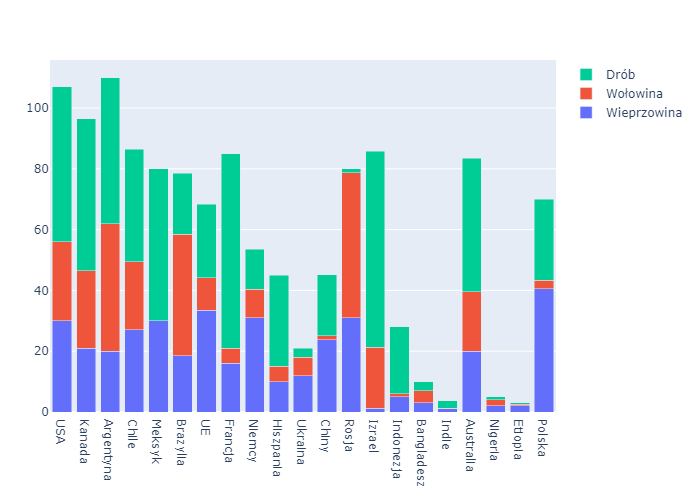

In [6]:
kraje2 = DataFrame(CSV.File("krajev2.csv"))
show(kraje2,allrows=true,allcols=true)

using PlotlyJS
kraje = kraje2[:,"kraje"]
y1=kraje2[:,"pork"]
y2=kraje2[:,"beef"]
y3=kraje2[:,"poultry"]
w = plot([
    bar(name="Wieprzowina", x=kraje, y=y1)
    bar(name="Wołowina", x=kraje, y=y2)
    bar(name="Drób", x=kraje, y=y3)
], Layout(barmode="stack"))


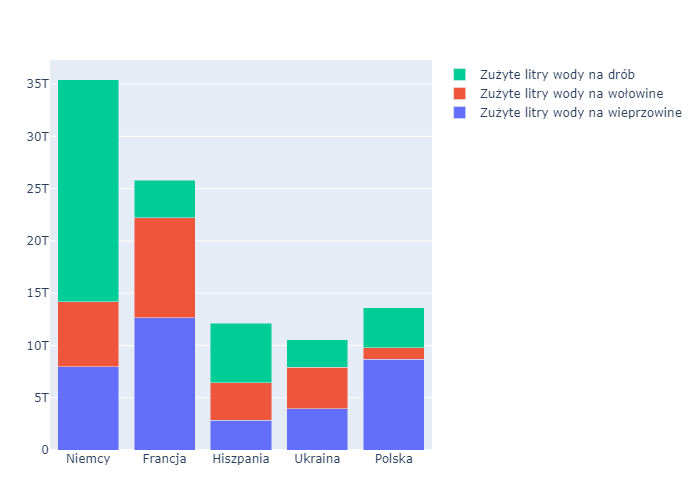

In [7]:
using PlotlyJS

function pomnoz_liste(lista, liczba, ludzie)
    for i in 1:length(lista)
        mnoznik = liczba * ludzie[i]
        lista[i] *= mnoznik
    end
    return lista
end

europa = ["Niemcy","Francja","Hiszpania","Ukraina","Polska"]
wieprzowina = [16,31,10,15,38]
wołowina = [5,9.4,5,6,2]
drób = [64,13.1,30,15,25]
ludzie = [83000000,68000000,47500000,44000000,38000000]
pomnoz_liste(wieprzowina,6000,ludzie)
pomnoz_liste(wołowina,15000,ludzie)
pomnoz_liste(drób,4000,ludzie)
a = plot([
    bar(name="Zużyte litry wody na wieprzowine", x=europa, y=wieprzowina)
    bar(name="Zużyte litry wody na wołowine", x=europa, y=wołowina)
    bar(name="Zużyte litry wody na drób", x=europa, y=drób)
], Layout(barmode="stack"))

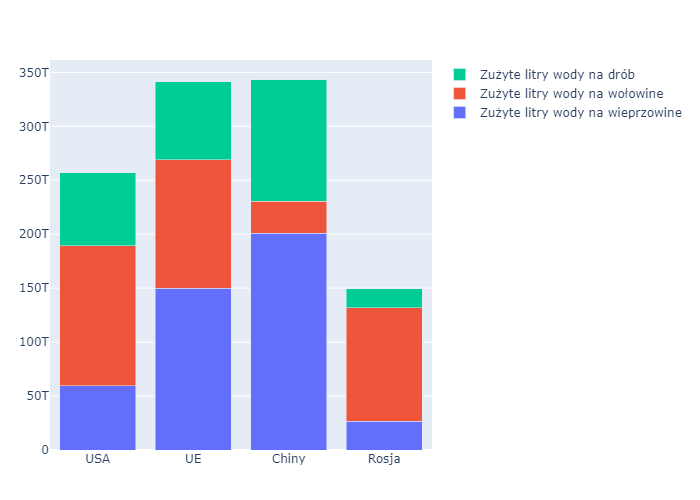

In [8]:
swiat = ["USA","UE","Chiny","Rosja"]
wieprzowina2 = [30,33.5,23.7,31]
wołowina2 = [26,10.6,1.4,49]
drób2 = [51,24.3,20,31]
ludzie2 = [332000000,747000000,1412000000,143000000]
pomnoz_liste(wieprzowina2,6000,ludzie2)
pomnoz_liste(wołowina2,15000,ludzie2)
pomnoz_liste(drób2,4000,ludzie2)
b = plot([
    bar(name="Zużyte litry wody na wieprzowine", x=swiat, y=wieprzowina2)
    bar(name="Zużyte litry wody na wołowine", x=swiat, y=wołowina2)
    bar(name="Zużyte litry wody na drób", x=swiat, y=drób2)
], Layout(barmode="stack"))

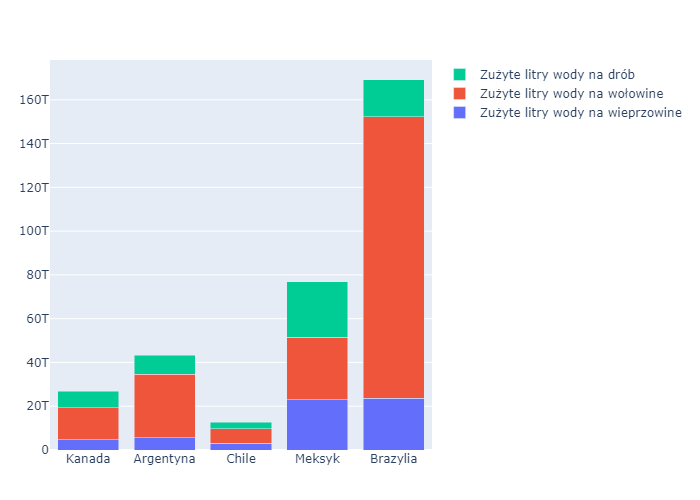

In [9]:
Ameryka = ["Kanada","Argentyna","Chile","Meksyk","Brazylia"]
wieprzowina3 = [21,20,27,30,18.5]
wołowina3 = [25.5,42,22.4,15,40]
drób3 = [50,48,37,50,20]
ludzie3 = [38000000,46000000,19500000,127000000,214000000]
pomnoz_liste(wieprzowina3,6000,ludzie3)
pomnoz_liste(wołowina3,15000,ludzie3)
pomnoz_liste(drób3,4000,ludzie3)
c = plot([
    bar(name="Zużyte litry wody na wieprzowine", x=Ameryka, y=wieprzowina3)
    bar(name="Zużyte litry wody na wołowine", x=Ameryka, y=wołowina3)
    bar(name="Zużyte litry wody na drób", x=Ameryka, y=drób3)
], Layout(barmode="stack"))

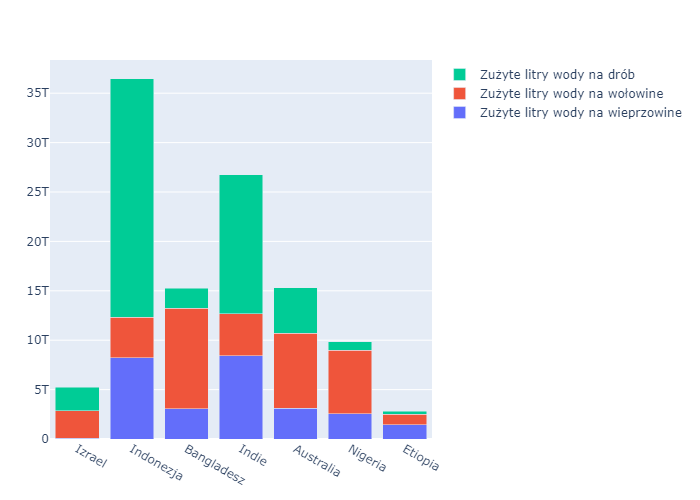

In [10]:
azjaafryka = ["Izrael","Indonezja","Bangladesz","Indie","Australia","Nigeria","Etiopia"]
wieprzowina4 = [1.3,5,3,1,20,2,2]
wołowina4 = [20,1,4,0.2,19.5,2,0.6]
drób4 = [64.5,22,3,2.5,44,1,0.6]
ludzie4 = [9300000,274000000,169500000,1408000000,26000000,213500000,120300000]
pomnoz_liste(wieprzowina4,6000,ludzie4)
pomnoz_liste(wołowina4,15000,ludzie4)
pomnoz_liste(drób4,4000,ludzie4)
d = plot([
    bar(name="Zużyte litry wody na wieprzowine", x=azjaafryka, y=wieprzowina4)
    bar(name="Zużyte litry wody na wołowine", x=azjaafryka, y=wołowina4)
    bar(name="Zużyte litry wody na drób", x=azjaafryka, y=drób4)
], Layout(barmode="stack"))

Sprawdzimy ile wody będzie zużywane, jeśli każdego dnia zapotrzebowanie na białko, tłuszcz i węglowodany będziemy uzupełniać jednym konkretnym produktem i tak przez 100 dni. Naszym obiektem badać będzie dorosły mężczyzny 1.80m 80kg. Wtedy jego zapotrzebowania wynoszą:
2600 kcal,
80g białka,
30% zapotrzebowania kalorycznego w postaci tłuszczy,
240g węglowodanów,


In [11]:
wege = foods_df[:,"Produkt"]
mieso = ["Beef","Chicken meat","Goat meat", "Lamb", "Pork"]
for i in 1:length(mieso), j in 1:length(wege)-1
    if mieso[i] == wege[j]
        deleteat!(wege,j)
    end
end

#stworzyliśmy dwa dataframe'y, mięso i wege
mieso_df = foods_df[in.(foods_df.Produkt,Ref(mieso)),:]
wege_df = foods_df[in.(foods_df.Produkt,Ref(wege)),:]


Row,Produkt,zuzycie_wody_na_100_g,Energia(kcal),Bialko,Tluszcze,Weglowodany
,String31,Float64,Float64,Float64,Float64,Float64
1,"Almonds, shelled or peeled",1609.5,626.0,29.0,49.2,13.3
2,Anise,828.0,337.0,17.6,15.9,50.02
3,Apple juice,114.1,46.0,0.0,0.0,11.67
4,"Apples, dried",684.7,243.0,0.93,0.32,65.9
5,"Apples, fresh",82.2,52.0,0.3,0.2,14.0
6,Apricots,128.7,250.0,2.5,0.0,62.5
7,Areca nuts,1116.5,249.0,5.0,4.0,47.0
8,Artichokes,81.8,50.0,3.33,0.0,10.83
9,Asparagus,215.0,18.0,2.35,0.0,3.53


Następujący wykres przedstawia zależność białka od zużytej wody na 100g produktu. Czerwonym kolorem oznaczone są produkty mięsne, a na niebiesko produkty bezmięsne

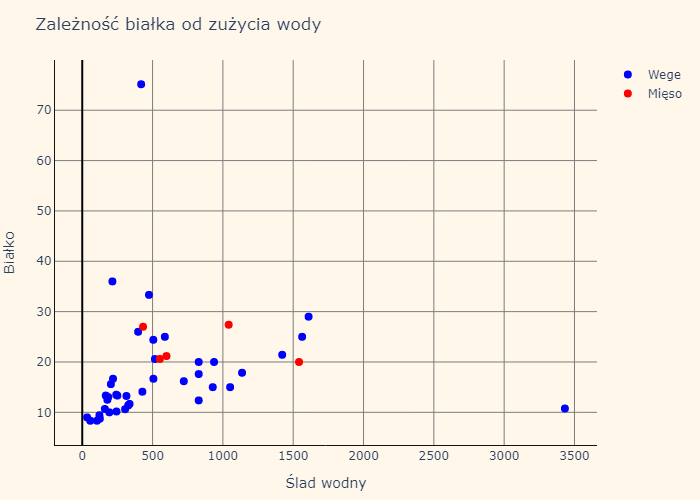

In [12]:
#TUTAJ UZYWAMY PLOTLYJS
#---------------------------------BIAŁKO-------------------------------------
#Analiza białka,wybieramy produkty bezmięsne o największej zawartości białka
top_bialko = sort!(wege_df,[order(:Bialko, rev=true)])[1:40,:]

#stwarzamy dane wege
trace_wege = scatter(top_bialko,
    x=:zuzycie_wody_na_100_g,
    y=:Bialko,
    text=:Produkt,
    mode="markers",
    name="Wege",
    marker_size=8,
    marker_color="blue")

#stwarzamy dane mięso
trace_mieso = scatter(mieso_df,
    x=:zuzycie_wody_na_100_g,
    y=:Bialko,
    text=:Produkt,
    mode="markers",
    name="Mięso",
    marker_size=8,
    marker_color="red")

#kreujemy layout
layout = Layout(;
    title="Zależność białka od zużycia wody",
    plot_bgcolor="rgb(254, 247, 234)",
    paper_bgcolor="rgb(254, 247, 234)",
    xaxis=attr(title="Ślad wodny",
        showgrid=true,
        gridcolor="rgb(125,125,125)",
        zeroline=true,
        zerolinecolor="rgb(0,0,0)",
        showline=true,
        linecolor="rgb(20,20,20)"
        ),
    yaxis=attr(title="Białko",
        showgrid=true,
        gridcolor="rgb(125,125,125)",
        zeroline=true,
        zerolinecolor="rgb(0,0,0)",
        showline=true,
        linecolor="rgb(20,20,20)"
        ))

#stwarzamy wykres
bialko_scatter = plot([trace_wege,trace_mieso],layout)

##


Na tym zaś wykresie możemy zobaczyć, jakie efekty będzie miało uzupełnianie białka w swojej diecie danym produktem przez 100 dni

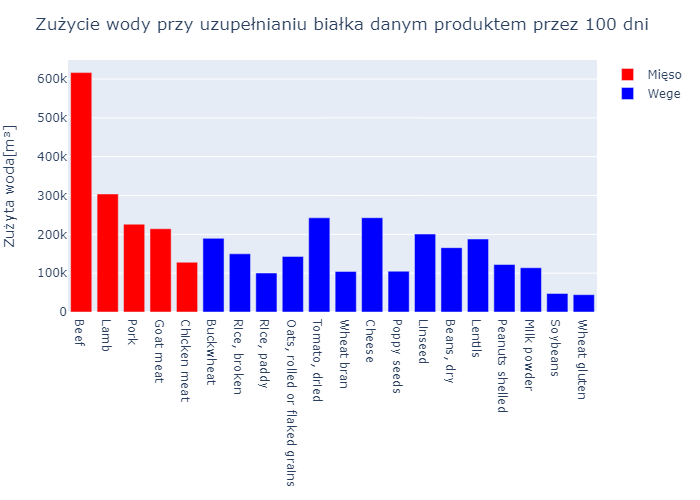

In [13]:

#ograniczamy produkty bezmięsne 3 produktem mięsnym o najmniejszym zużyciu wody
ograniczenie_bialko = sort!(mieso_df,[order(:zuzycie_wody_na_100_g,rev=true)])[3,2]
wyniki_bialko = top_bialko[top_bialko.zuzycie_wody_na_100_g .< ograniczenie_bialko,:]

bialko_100_dni = [(wyniki_bialko[i,1],(wyniki_bialko[i,2]*(80/wyniki_bialko[i,4]))*100, round((80/wyniki_bialko[i,4])*100,digits=2))  for i in 1:28]
sort!(bialko_100_dni, by=last, rev=true)

trace2 = bar(;
    x = [bialko_100_dni[i][1] for i in 14:28],
    y = [bialko_100_dni[i][2] for i in 14:28],
    text = [bialko_100_dni[i][3] for i in 14:28],
    name = "Wege",
    marker_color = "blue",
    )

trace1 = bar(;
    x = [mieso_df[i,1] for i in 1:5],
    y = [(mieso_df[i,2]*(80/mieso_df[i,4]))*100 for i in 1:5],
    text = [string(round((80/mieso_df[i,4])*100,digits=2))*"g" for i in 1:5],
    name = "Mięso",
    marker_color = "red",
    )
layout = Layout(;
    title="Zużycie wody przy uzupełnianiu białka danym produktem przez 100 dni",
    yaxis = attr(
        title="Zużyta woda[m³]"
    ))

plot([trace1,trace2],layout)


Następnie mamy te same wykresy, tylko że dla tłuszczy i węglowodanów.

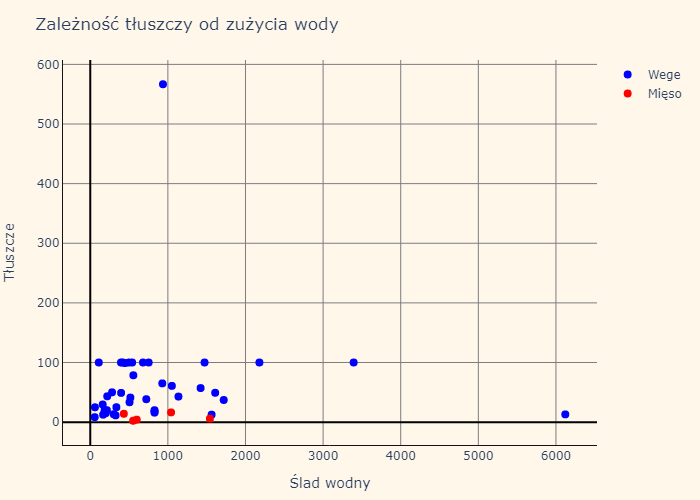

In [14]:
#------------------------------TŁUSZCZE-----------------------------------------
#Analiza tłuszczy, wybieramy produkty bezmięsne o największej zawartości białka
top_tluszcze = sort!(wege_df,[order(:Tluszcze, rev=true)])[1:40,:]

#stwarzamy dane wege
trace_wege = scatter(top_tluszcze,
    x=:zuzycie_wody_na_100_g,
    y=:Tluszcze,
    text=:Produkt,
    mode="markers",
    name="Wege",
    marker_size=8,
    marker_color="blue")

#stwarzamy dane mięso
trace_mieso = scatter(mieso_df,
    x=:zuzycie_wody_na_100_g,
    y=:Tluszcze,
    text=:Produkt,
    mode="markers",
    name="Mięso",
    marker_size=8,
    marker_color="red")
    
#kreujemy layout
layout = Layout(;title="Zależność tłuszczy od zużycia wody",
    plot_bgcolor="rgb(254, 247, 234)",
    paper_bgcolor="rgb(254, 247, 234)",
    xaxis=attr(title="Ślad wodny",
        showgrid=true,
        gridcolor="rgb(125,125,125)",
        zeroline=true,
        zerolinecolor="rgb(0,0,0)",
        showline=true,
        linecolor="rgb(20,20,20)"
        ),
    yaxis=attr(title="Tłuszcze",
        showgrid=true,
        gridcolor="rgb(125,125,125)",
        zeroline=true,
        zerolinecolor="rgb(0,0,0)",
        showline=true,
        linecolor="rgb(20,20,20)"
        ))

#stwarzamy wykres
tluszcze_scatter = plot([trace_wege,trace_mieso],layout)


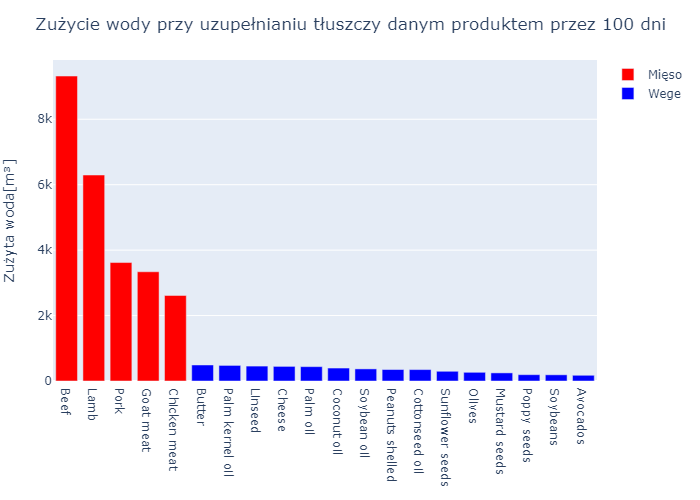

In [15]:
#ograniczamy produkty bezmięsne 3 produktem mięsnym o najmniejszym zużyciu wody
ograniczenie_tluszcze = sort(mieso_df,order(:zuzycie_wody_na_100_g, rev=true))[3,2]
wyniki_tluszcze = top_tluszcze[top_tluszcze.zuzycie_wody_na_100_g .< ograniczenie_tluszcze,:]   # z olejami
#wyniki_tluszcze = top_tluszcze[(top_tluszcze.zuzycie_wody_na_100_g .< ograniczenie_tluszcze) .& (top_tluszcze.Tluszcze .< 90),:]

(780/wyniki_tluszcze[1,3]) 

tluszcze_100_dni = [(wyniki_tluszcze[i,1],string(round((780/wyniki_tluszcze[i,3])*wyniki_tluszcze[i,5],digits=2))*"g" ,(wyniki_tluszcze[i,2]*(780/wyniki_tluszcze[1,3]))) for i in 1:20 ]
sort!(tluszcze_100_dni, by=last, rev=true)

trace2 = bar(;
    x = [tluszcze_100_dni[i][1] for i in 1:15],
    y = [tluszcze_100_dni[i][3] for i in 1:15],
    text = [tluszcze_100_dni[i][2] for i in 1:15],
    name = "Wege",
    marker_color = "blue",
    )

# trace2 = bar(;
#     x = [tluszcze_100_dni[i][1] for i in 1:20],
#     y = [tluszcze_100_dni[i][3] for i in 1:20],
#     text = [tluszcze_100_dni[i][2] for i in 1:20],
#     name = "Wege",
#     marker_color = "blue",
#     )

trace1 = bar(;
    x = [mieso_df[i,1] for i in 1:5],
    y = [mieso_df[i,2]*(780/mieso_df[1,3]) for i in 1:5],
    text = [string(round((780/mieso_df[i,3])*mieso_df[i,5],digits=2))*"g"  for i in 1:5],
    name = "Mięso",
    marker_color = "red",
    )

layout = Layout(;
    title="Zużycie wody przy uzupełnianiu tłuszczy danym produktem przez 100 dni",
    yaxis = attr(
        title="Zużyta woda[m³]"
    ))
plot([trace1,trace2],layout)
# plot(trace2,layout)


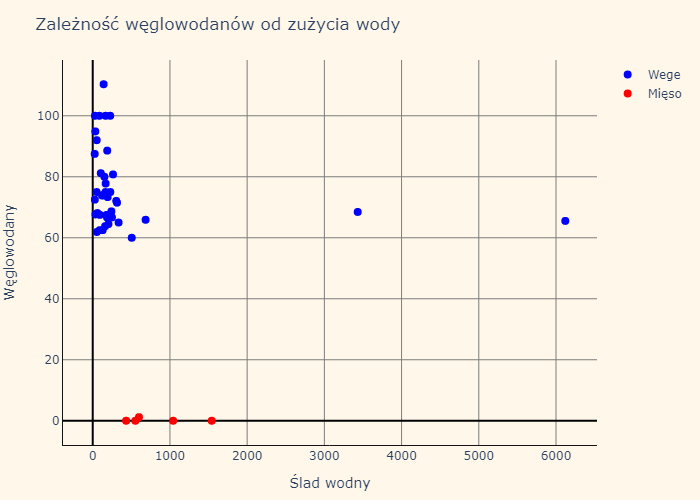

In [16]:
#---------------------------------WĘGLOWODANY-------------------------------------

#Analiza węglowodanów, wybieramy produkty bezmięsne o największej zawartości białka
top_wegle = sort!(wege_df,[order(:Weglowodany, rev=true)])[1:40,:]

#stwarzamy dane wege
trace_wege = scatter(top_wegle,
    x=:zuzycie_wody_na_100_g,
    y=:Weglowodany,
    text=:Produkt,
    mode="markers",
    name="Wege",
    marker_size=8,
    marker_color="blue")

#stwarzamy dane mięso
trace_mieso = scatter(mieso_df,
    x=:zuzycie_wody_na_100_g,
    y=:Weglowodany,
    text=:Produkt,
    mode="markers",
    name="Mięso",
    marker_size=8,
    marker_color="red")

#kreujemy layout
layout = Layout(;
    title="Zależność węglowodanów od zużycia wody",
    plot_bgcolor="rgb(254, 247, 234)",
    paper_bgcolor="rgb(254, 247, 234)",
    xaxis=attr(title="Ślad wodny",
        showgrid=true,
        gridcolor="rgb(125,125,125)",
        zeroline=true,
        zerolinecolor="rgb(0,0,0)",
        showline=true,
        linecolor="rgb(20,20,20)"
        ),
    yaxis=attr(title="Węglowodany",
        showgrid=true,
        gridcolor="rgb(125,125,125)",
        zeroline=true,
        zerolinecolor="rgb(0,0,0)",
        showline=true,
        linecolor="rgb(20,20,20)"
        ))

#stwarzamy wykres
wegle_scatter = plot([trace_wege,trace_mieso],layout)


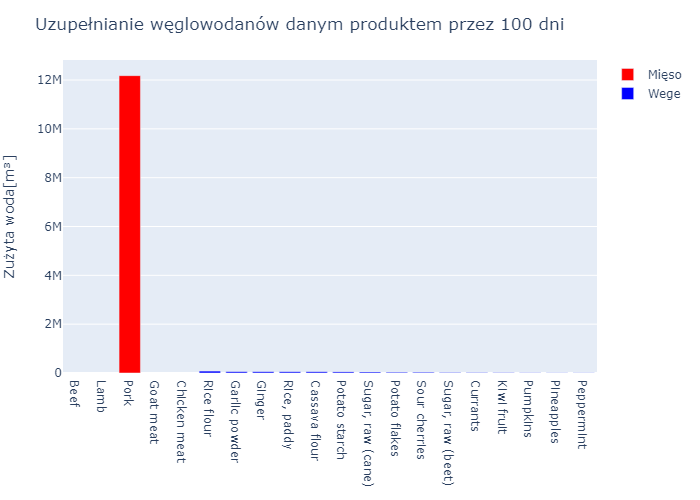

In [17]:
#ograniczamy produkty bezmięsne 3 produktem mięsnym o najmniejszym zużyciu wody
ograniczenie_wegle = sort!(mieso_df,[order(:zuzycie_wody_na_100_g,rev=true)])[3,2]
wyniki_wegle = top_wegle[top_wegle.zuzycie_wody_na_100_g .< ograniczenie_wegle,:]

wegle_100_dni = [(wyniki_wegle[i,1],string(round((240/wyniki_wegle[i,6])*100,digits=2))*"g" ,(wyniki_wegle[i,2]*(240/wyniki_wegle[i,6]))*100 ) for i in 1:15]
sort!(wegle_100_dni, by=last, rev=true)

trace2 = bar(;
    x = [wegle_100_dni[i][1] for i in 1:15],
    y = [wegle_100_dni[i][3] for i in 1:15],
    text = [wegle_100_dni[i][2] for i in 1:15],
    name = "Wege",
    marker_color = "blue",
    )

# trace2 = bar(;
#     x = [wegle_100_dni[i][1] for i in 1:20],
#     y = [wegle_100_dni[i][3] for i in 1:20],
#     text = [wegle_100_dni[i][2] for i in 1:20],
#     name = "Wege",
#     marker_color = "blue",
#     )

trace1 = bar(;
    x = [mieso_df[i,1] for i in 1:5],
    y = [(mieso_df[i,2]*(240/mieso_df[i,6]))*100 for i in 1:5],
    text = [string(round((240/mieso_df[i,6])*100,digits=2))*"g" for i in 1:5],
    name = "Mięso",
    marker_color = "red",
    )
layout = Layout(;
    title="Uzupełnianie węglowodanów danym produktem przez 100 dni",
    yaxis = attr(
        title="Zużyta woda[m³]"
    ))

plot([trace1,trace2],layout)
#plot(trace2,layout)



Już teraz na całym świecie 2,1 miliarda ludzi żyje bez bezpiecznej wody, a około 4 miliardy ludzi doświadcza poważnego niedoboru wody przez co najmniej jeden miesiąc w roku. Według ONZ do 2030 roku 700 milionów ludzi na całym świecie może zostać przesiedlonych z powodu intensywnego niedoboru wody, dodatkowo do 2050 roku przybędzie 2 mld ludzi a rolnictwo będzie pochłaniać o 20% więcej wody niż obecnie (90% zasobów słodkiej wody).Organizacja Współpracy Gospodarczej i Rozwoju (OECD) opublikowała raport według którego do połowy wieku zapotrzebowanie na wodę pitną wzrośnie o 55%, z czego 40% populacji będzie korzystać z wody ze zbiorników, które będą w znacznej mierze wyschnięte. Po 2070 roku niedostatek wody zaczną odczuwać mieszkańcy południowej i środkowej Europy, w tym także Polski.

**Czy zmiana diety uratuje nas przed utratą wody?**

Na podstawie danych z wspomnianego wcześniej badania policzyliśmy, jak zmiana diety wpłynie na to, kiedy skończy się woda na świecie (wg badań jeśli nic nie zmienimy zaczniemy odczuwać brak wody w 2050 roku i ten rok wzięliśmy jako bazę). Na pierwszej animacji przedstawiamy jak zmieni się sytuacja, gdy dany procent (7%, 50% i 100%) ludzi zmieni dietę na zdrową wegańską.

In [4]:
using Plots

woda = 3.4*10^17
ludzie = 9000000000
rocznie = 1400000
function animacja(t)
	 f(t) = woda - 0.93*rocznie*ludzie*(t-2023) - 0.07*rocznie*ludzie*0.5 *(t-2023)
	 g(t) = woda - 0.5*rocznie*ludzie*(t-2023) - 0.5*rocznie*ludzie*0.5 *(t-2023)
	 h(t) = woda - 0.5*rocznie*ludzie*(t-2023)
	 x = range(2023, 2023+t, length=100)
	 #xlims!(0, 70)
	 ylims!(0, woda)
	plot!(x, [f, g, h], title = "Rok $(t+2023)", label = ["7%" "50%" "100%"], lw = 3, ylims=(0, woda))
end
anim = @animate for t in 0:55
	a=range(2024,2080,length=100)
	b(a)=0
	plot(a,b,label="")
    animacja(t)
end persist=true
mp4(anim,"koniecwody1.mp4", fps = 5)

┌ Info: Saved animation to c:\Users\dell\Downloads\koniecwody1.mp4
└ @ Plots C:\Users\dell\.julia\packages\Plots\9Q9pN\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\dell\\Downloads\\koniecwody1.mp4")

Na drugiej animacji porównamy 4 różne diety.

In [5]:
using Plots

woda = 3.4*10^17
ludzie = 9000000000
rocznie = 1400000
function animacja1(t)
	 f(t) = woda - rocznie*ludzie*(t-2023) 
	 m(t) = woda - 0.5*rocznie*ludzie*(t-2023) - 0.5*rocznie*ludzie*0.6(t-2023)
	 n(t) = woda - 0.6*rocznie*ludzie*(t-2023)
	 x = range(2023, 2023+t, length=100)
	p2 = plot!(x, [f, m, n], title = "Dieta wegańska", label = ["0%" "50%" "100%"], lw = 3,  ylims=(0, woda))
	
end
function animacja2(t)
	f(t) = woda - rocznie*ludzie*(t-2023) 
	g(t) = woda - 0.5*rocznie*ludzie*(t-2023) - 0.5*rocznie*ludzie*0.45 *(t-2023)
	h(t) = woda - 0.45*rocznie*ludzie*(t-2023)
	
	x = range(2023, 2023+t, length=100)
   p1 = plot!(x, [f, g, h], title = "Zdrowa dieta wegańska", label = ["0%" "50%" "100%"], lw = 3, ylims=(0, woda))
   
end
function animacja3(t)
	f(t) = woda - rocznie*ludzie*(t-2023) 
	
	i(t) = woda - 0.5*rocznie*ludzie*(t-2023) - 0.5*rocznie*ludzie*0.77*(t-2023)
	j(t) = woda - 0.77*rocznie*ludzie*(t-2023)
	
	x = range(2023, 2023+t, length=100)
  p3 = plot!(x, [f, i, j], title = "Zdrowa dieta mięsna", label = ["0%" "50%" "100%"], lw = 3, ylims = (0, woda))
   
end
function animacja4(t)
	f(t) = woda - rocznie*ludzie*(t-2023) 
	k(t) = woda - 0.5*rocznie*ludzie*(t-2023) - 0.5*rocznie*ludzie*0.56*(t-2023)
	l(t) = woda - 0.56*rocznie*ludzie*(t-2023)
	x = range(2023, 2023+t, length=100)
   p4 = plot!(x, [f, k, l], title = "Dieta pesceterian", label = ["0%" "50%" "100%"], lw = 3, ylims = (0, woda))
end
anim = @animate for t in 0:57
	a=range(2024,2080,length=100)
	b(a)=0
	p1=plot(a,b,label="")
	animacja1(t)
	p2=plot(a,b,label="")
	animacja2(t)
	p3=plot(a,b,label="")
	animacja3(t)
	p4=plot(a,b,label="")
	animacja4(t)
	plot(p1, p2, p3, p4, layout=(2,2),xlabel="")
end persist=true
mp4(anim,"koniecwody2.mp4", fps = 5)

┌ Info: Saved animation to c:\Users\dell\Downloads\koniecwody2.mp4
└ @ Plots C:\Users\dell\.julia\packages\Plots\9Q9pN\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\dell\\Downloads\\koniecwody2.mp4")

Źródła:
https://www.twojapogoda.pl/wiadomosc/2023-01-26/swiatowe-zasoby-wody-pitnej-sa-w-zagrozeniu-naukowcy-juz-wiedza-kto-za-tym-stoi-i-jak-to-sie-skonczy/
https://opowiecie.info/zasoby-wody-na-ziemi-czyli-woda-ktora-znika/
https://www.naszaziemia.pl/wiedza/woda-kropla-do-kropli/czy-wiesz-ze-1/
https://www.hsi.org/news-media/world-water-day-2019/?fbclid=IwAR3Qo0UxEc8pOiX70vRcyMrybaejCaiPURxJvO09gVhEHcbMubhtFuXcbiw
https://www.nature.com/articles/s41893-018-0133-x
https://www.wodkany.pl/zuzycie-wody-w-polsce-infografika/
https://evgenii.com/water-footprint/en/
https://foodfakty.pl/konsumpcja-miesa-na-swiecie-wzrasta-chociaz-jest-silnie-zroznicowana
https://wisevoter.com/country-rankings/meat-consumption-by-country
https://www.farmer.pl